<a href="https://colab.research.google.com/github/sathyadithyarithi/ITI103_myClasswork/blob/main/3_Machine_Learning_Process_(Solution)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing Dataset
## Getting the data
We will be using the California housing Prices dataset.  This dataset was based on data from the 1990 California census.  

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv



## Basic Data Analysis
Q1  Let's load the data from the url and perform basic data analysis.

*   Check the Sample size (Hint: shape)
*   Check the features (Hint: describe method)
*   Check for missing values using info method



In [160]:
# @title Default title text
import pandas as pd
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)
print(df.head())
print('>>> Check the sample size:')
# use shape

print('>>> Check for the features: ')
# use describe

print('>>> Check for missing values')
# use info


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
>>> Check the sample size:
>>> Check for the features: 
>>> Check for missi

In [108]:
#@title
import pandas as pd
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)
print(df.head())
print('>>> Check the sample size:')
print(df.shape)
print('>>> Check for the features: ')
print(df.describe())
print('>>> Check for missing values')
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
>>> Check the sample size:
(20640, 10)
>>> Check for the features: 
       

Q2. Creates a histogram and inspect the attributes distribution to look for insights



In [109]:
import matplotlib.pyplot as plt
# Creates a histogram

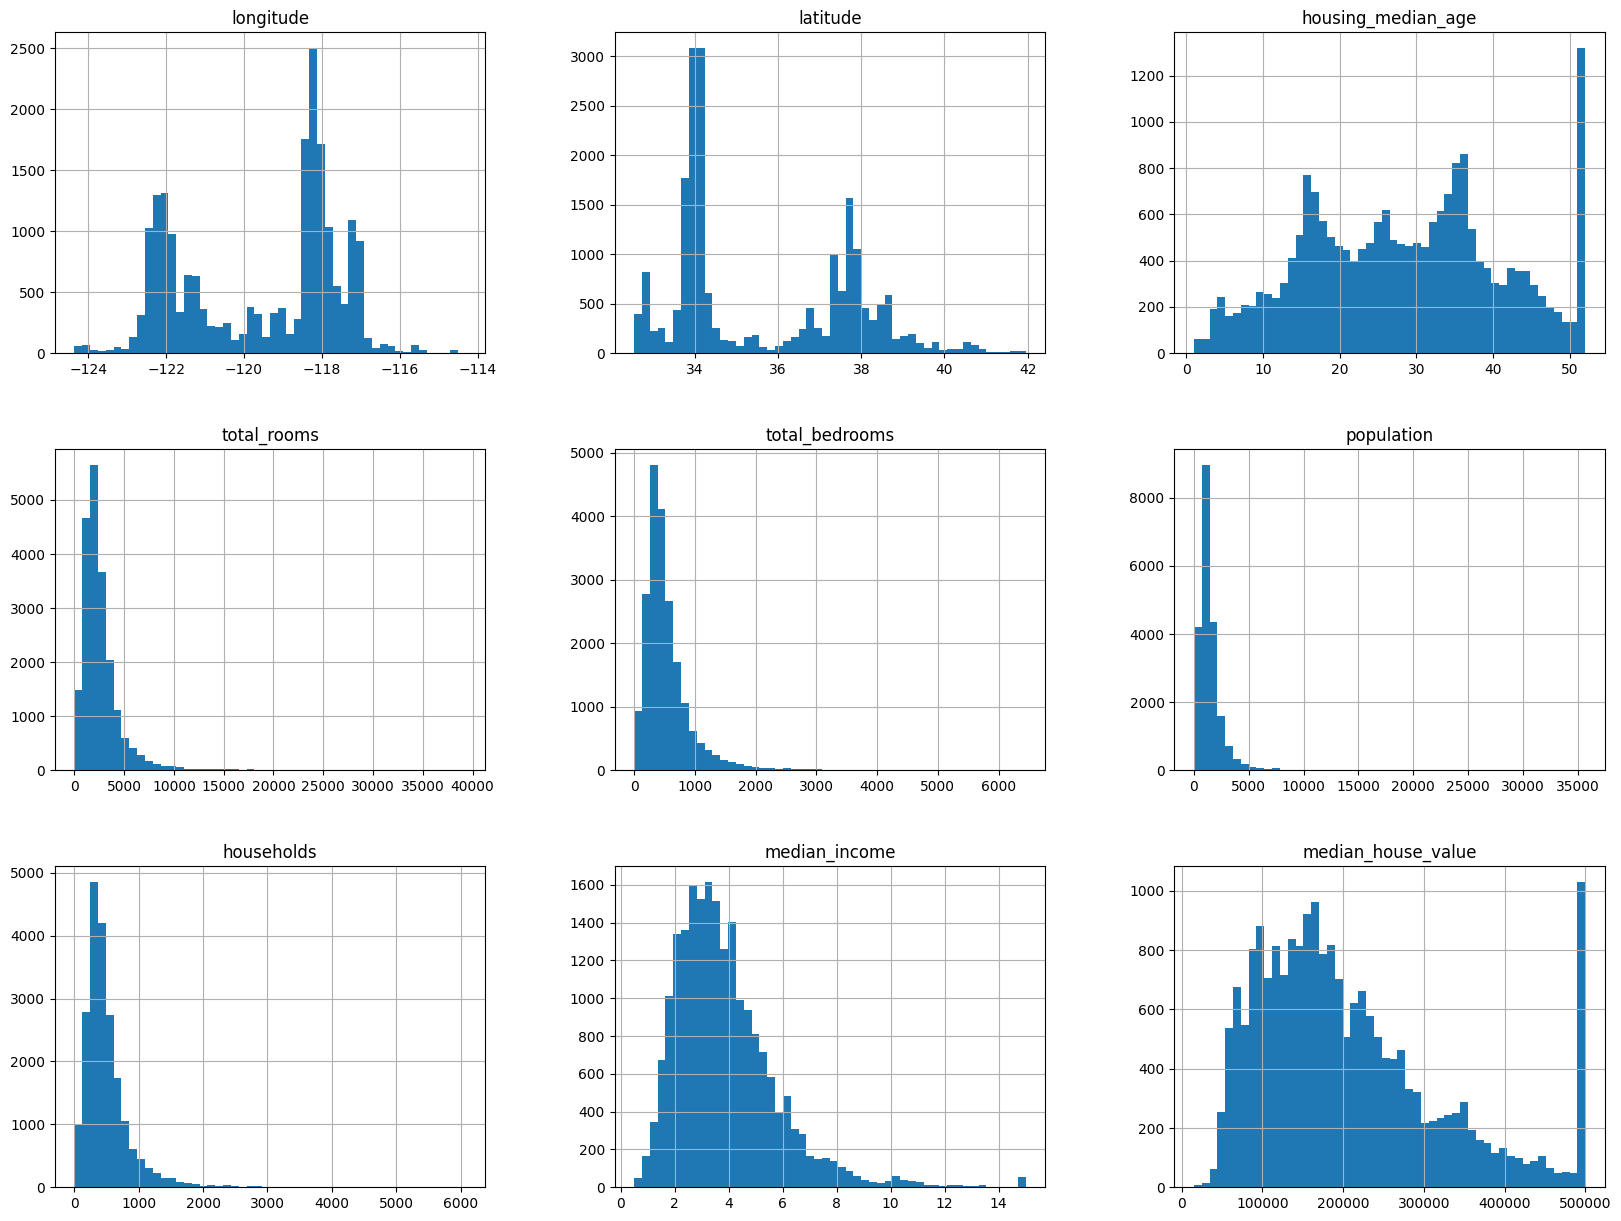

In [110]:
#@title
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set
## Simple Random Sampling

Q3.  Split the training set to 80/20 using random sampling technique

In [163]:
import numpy as np
# random sampling, 80/20 split
print('creating test and training datset')


creating test and training datset


In [164]:
#@title
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(df, 0.2)
print(len(train_set), 'train', len(test_set), 'test')

16512 train 4128 test


## Using Stratified Sampling

Stratified random sampling is a method of sampling that involves the division of a population into smaller sub-groups known as strata. This part will shows you how you could use Stratified Sampling to split the data into training and testing set. We use the pd.cut() to bin the median income into 5 categories (e.g. 0 to 1.5 is cat 1, 1.5 to 3.0 is cat 2, 3.0 to 4.5 is cat 3, 4.5 to 6 is cat 4, and 6 to infinity is cat 5).

In [165]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df.income_cat.value_counts().sort_index()


income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, shuffle=True, stratify=df['income_cat'])
print(len(strat_train_set), 'train', len(strat_test_set), 'test')

16512 train 4128 test


Measure the income category proportions in the test set generated with random sampling and stratified sampling.  The test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.

In [169]:
def income_cat_props(data):
  return data['income_cat'].value_counts()/len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall': income_cat_props(df),
    'Stratified': income_cat_props(strat_test_set),
    'Random': income_cat_props(test_set)
}).sort_index()

compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

print(' Straified and Random errors. Startified spread across all caegories - error same as original where as random error is big')

compare_props


 Straified and Random errors. Startified spread across all caegories - error same as original where as random error is big


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


## Discover and Visualize the Data to Gain Insights

Q4. We shall discover and visualize the Data to gain more insights.   Let's create a copy of the housing data so that we can experiment with it without affecting the training set.  Use the copy method to create a new copy of the stratified training data set and creates a scatter plot of all the districts to visualize poppulation density with respect to the longitude and latitude data.

In [170]:
# scatter plot of all districts

<Axes: xlabel='longitude', ylabel='latitude'>

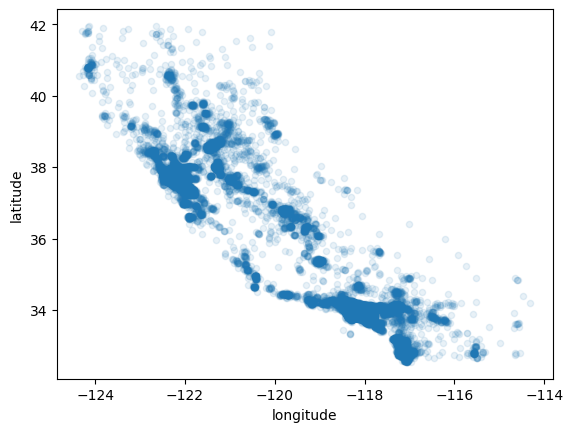

In [117]:
#@title
housing = strat_train_set.copy()
housing.plot(kind='scatter',  x='longitude', y='latitude', alpha=0.1)

In this scatter plot, we examine the housing prices with the radius of each circle representing the district's poulation (option s) and the color represents the price (option c).  The predefined color map (option cmap) called jet, ranges from blue for low values to red for high values.

In [118]:
# scatter plot with color map

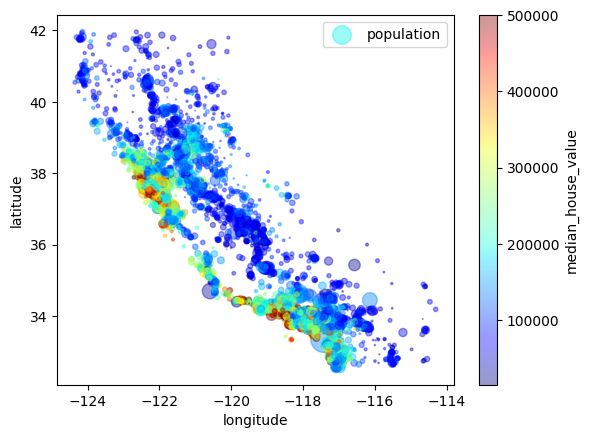

In [119]:
#@title
import matplotlib.pyplot as plt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population'] / 100, label='population',
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()


### Looking for Correlations

Q5.  Compute the standard correlation coefficient between every pair of attributes using the corr() method, and examine how much each attribute with the median house value

In [120]:
# compute the standard correlation coefficient


In [121]:
#@title
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687222
total_rooms           0.137178
housing_median_age    0.105936
households            0.067835
total_bedrooms        0.051616
population           -0.024904
longitude            -0.048294
latitude             -0.141865
Name: median_house_value, dtype: float64

Another way to check for correlation between attributes is to use scatter_matrix function which plots every numerical attribute against every other numerical attribute.  The most promising attribute the predict the median house value seems to be the median income.  

In [122]:
# scatter matrix


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

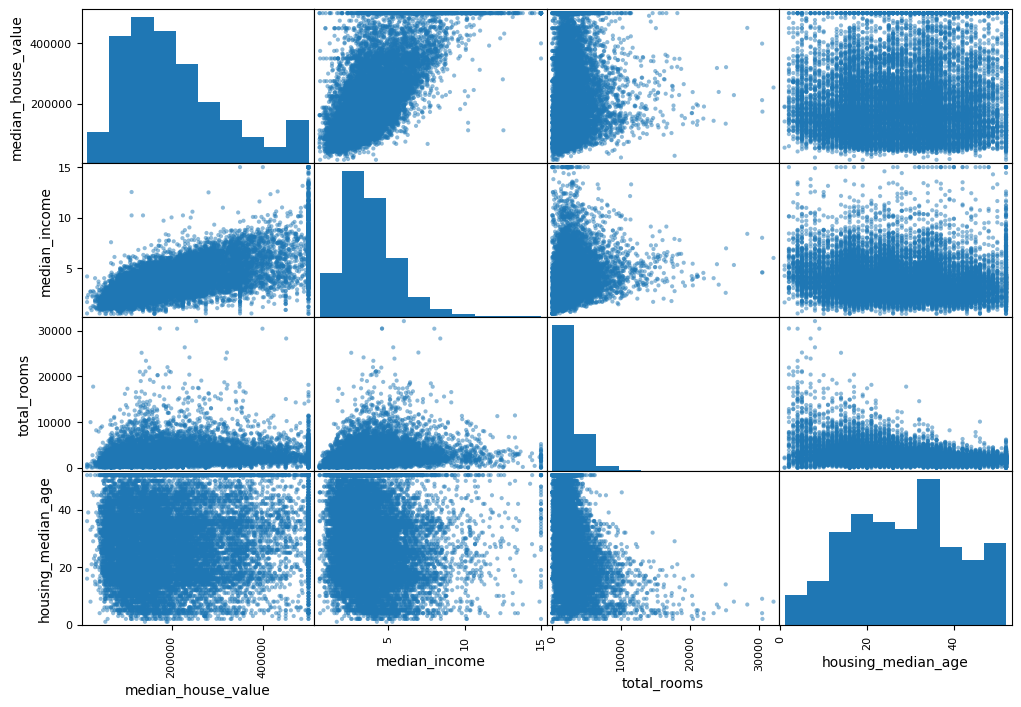

In [123]:
#@title
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

Q6.  Creates the scatter plot to show the  correlation of medina_income and median_housing_value, ane examine the visualisation.

In [124]:
# scatter plot


<Axes: xlabel='median_income', ylabel='median_house_value'>

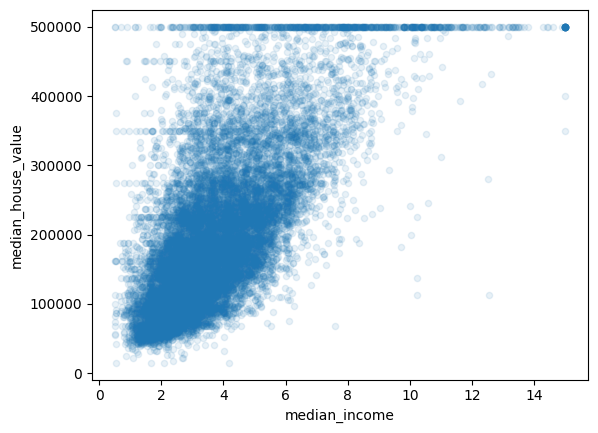

In [125]:
#@title
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

In [126]:
housing[ (housing['median_house_value'] < 360000) & (housing['median_house_value'] > 340000) ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
15622,-122.41,37.80,52.0,2618.0,611.0,1328.0,559.0,4.1607,350000.0,NEAR BAY,3
1577,-122.02,37.80,11.0,6200.0,907.0,2286.0,896.0,7.6518,359300.0,NEAR BAY,5
11640,-118.06,33.83,21.0,3941.0,655.0,1897.0,670.0,4.8800,343900.0,<1H OCEAN,4
18139,-122.01,37.34,31.0,3080.0,526.0,1493.0,582.0,6.3052,344200.0,<1H OCEAN,5
11180,-117.94,33.83,20.0,812.0,192.0,494.0,172.0,3.2500,350000.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
5058,-118.35,34.01,33.0,3246.0,601.0,1585.0,603.0,3.6629,353200.0,<1H OCEAN,3
11611,-118.06,33.78,22.0,4048.0,562.0,1637.0,541.0,7.3463,355600.0,<1H OCEAN,5
15270,-117.29,33.08,18.0,3225.0,515.0,1463.0,476.0,5.7787,346700.0,NEAR OCEAN,4
1562,-121.94,37.76,4.0,6875.0,1439.0,2889.0,1307.0,4.6932,356100.0,<1H OCEAN,4


### Experimenting with Attribute Combinations
Q7.  Try out various attribute combinations before actually preparing the data for Machine Learning.  Creates these 3 new attributes:


*   rooms per household ( total rooms / households )
*   bedrooms per room (total bedrooms / total rooms)
*   population per house hold (population / households)

And compute the correlation matrix again to examine the correlation between median house values and all the other attributes, including these 3 new attributes.

In [127]:
# Creates new attributes and compute the correlation matrix



In [128]:
#@title
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687222
rooms_per_household         0.147272
total_rooms                 0.137178
housing_median_age          0.105936
households                  0.067835
total_bedrooms              0.051616
population                 -0.024904
population_per_household   -0.026624
longitude                  -0.048294
latitude                   -0.141865
bedrooms_per_room          -0.249569
Name: median_house_value, dtype: float64

We can see that the correlation for bedrooms_per_room and rooms_per_household are much higher than other attributes. You might consider to add these two new attributes.

## Data Cleaning
Q8 There are some missing values within the data set for total_bedroom attribute, fix it by


*   Get rid of the corresponding districts
*   Get rid of the whole attribute
*   Set the values to some value, such as zero, mean or median



In [129]:
# Data cleaning


In [130]:
#@title
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels=strat_train_set['median_house_value'].copy()
# Get rid of districts with missing values
housing.dropna(subset=['total_bedrooms'])
# Get rid of the attribute
housing.drop('total_bedrooms', axis = 1)
median = housing['total_bedrooms'].median()
# Set the missing values to median
housing['total_bedrooms'].fillna(median)
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 7869 to 20167
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16344 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_cat          16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB
None


In [131]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,NEAR BAY,4
4391,-118.27,34.07,27.0,1190.0,NaN,1795.0,422.0,1.7016,<1H OCEAN,2
6590,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001,<1H OCEAN,5
6421,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND,2
2420,-119.44,36.58,37.0,1054.0,NaN,879.0,257.0,2.5234,INLAND,2


Scikit Learn provides a handy class to take care of missing values: Imputer.
* Creates an Imputer instance, specifying that you want to replace the missing attribute's missing values with the median of that attribute.   
* Creates a copy of the data without the text attribute ocean_proximity
*  Fit the imputer instance to the training data using the fit() method:
*  Display the statistics_ instance variable of the imputer object.

In [132]:
#@title
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis = 1)
#fit() method of SimpleImputer calculates the necessary statistics from the dataset
imputer.fit(housing_num)
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2129.    ,  436.    , 1168.    ,
        410.    ,    3.5338,    3.    ])

In [133]:
#@title
# transform() method to replace missing values in your dataset with the computed statistics
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = list(housing.index.values))
print(housing_tr.loc[sample_incomplete_rows.index.values])

      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
563     -122.24     37.75                45.0        891.0           436.0   
4391    -118.27     34.07                27.0       1190.0           436.0   
6590    -118.18     34.19                48.0       1371.0           436.0   
6421    -117.99     34.14                30.0       2346.0           436.0   
2420    -119.44     36.58                37.0       1054.0           436.0   

      population  households  median_income  income_cat  
563        384.0       146.0         4.9489         4.0  
4391      1795.0       422.0         1.7016         2.0  
6590       528.0       155.0        15.0001         5.0  
6421      1988.0       474.0         2.5625         2.0  
2420       879.0       257.0         2.5234         2.0  


In [134]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
7869,<1H OCEAN
17811,<1H OCEAN
11118,<1H OCEAN
19318,NEAR OCEAN
18243,NEAR BAY


## Handling Text and Categorical Attributes

OrdinalEncoder is used to transform categorical text data into integer representations, preserving the importance of sequence or order among the categories.

In [135]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [4.],
       [3.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [136]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

LabelEncoder is used to convert categorical text data into integer representations without considering any meaningful sequence or order among the categories.

In [137]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 4, 3, 1, 1, 1, 0, 0])

In [138]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

OneHotEncoder is used to convert integer categorical values into binary vectors.

In [139]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [140]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.]])

In this previous case. The categorical attribute ocean_proximity was left out because it is a text attribute so we cannot compute its median.  

LabelBinarizer can be used to transform from text to ordinal/integer categoris, then from integer categories to one-hot vectors in one shot.

In [141]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

## Automate with Pipelines

Scikit-Learn provides the Pipeline class to help with data transformation steps that need to be executed in the right order.  A full pipeline handling both numerical and categorical attributes may look like this:

In [142]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [143]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)


In [144]:
housing_prepared

array([[ 0.71977621, -0.82309439,  0.26890287, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14420832,  0.81986387, -1.00117824, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84935802, -0.84181756, -0.92179817, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.10256991,  0.57178185, -1.6362188 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1882643 , -1.31925842,  0.42766301, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.1516098 , -0.56096999, -0.52489782, ...,  0.        ,
         0.        ,  0.        ]])

In [145]:
housing_prepared.shape

(16512, 14)

## Select and Train a Model
## Evaluating the model

Q9. Train a Linear Regression model with the prepared data.

In [146]:
# Linear Regression model


In [147]:
#@title
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Try it out on a few instances from the training set.  It works, but the predictions are not exactly accurate.

In [148]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [209076.69182054 217757.38519734 249855.67879688 215919.43093543
 257289.39016869]
Labels: [192700.0, 229800.0, 249200.0, 120000.0, 275000.0]


##Root Mean Square error (RMSE)

Q10.  Measure the regression model RMSE on the whole training set using Scikit-Learn's mean_squared_error functions.

In [149]:
from sklearn.metrics import mean_squared_error



In [150]:
#@title
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68285.51305539909

## Linear Regression

Q11.  Measure the regression model MAE on the whole training set using Scikit-Learn's mean_absolute_error functions

In [151]:
from sklearn.metrics import mean_absolute_error



In [152]:
#@title
from sklearn.metrics import mean_absolute_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49861.71385600882

## Decision Tree

Let's try to use a DecisionTreeRegressor to train the model for comparison purpose.  The model seemed to have badly overfit the data.  

In [153]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [154]:

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Evaluation using Cross-Validation

Q12.  Use the cross validation feature to splits the training set into 10 distinct folds, then trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time.  Display the scores using the display_scores function given above.

In [155]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [156]:
from sklearn.model_selection import cross_val_score



In [157]:
#@title
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
print(scores)
tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)
display_scores(tree_rmse_scores)

[-5.02863315e+09 -4.71192526e+09 -4.62955613e+09 -4.36807497e+09
 -4.89408162e+09 -4.25228582e+09 -4.62092559e+09 -4.89890700e+09
 -4.65798498e+09 -4.07768601e+09]
[70912.85601264 68643.46476718 68040.841602   66091.41370953
 69957.71309501 65209.55309751 67977.39026382 69992.19241076
 68249.43208769 63856.76168676]
Scores: [70912.85601264 68643.46476718 68040.841602   66091.41370953
 69957.71309501 65209.55309751 67977.39026382 69992.19241076
 68249.43208769 63856.76168676]
Mean: 67893.16187329013
Standard deviation: 2127.115869780746


Q13. Compute the same scores for the LInear Regression model

In [158]:
#@title

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
print(lin_scores)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

[-4.75420565e+09 -5.51179593e+09 -4.47654792e+09 -4.33944272e+09
 -4.57072036e+09 -4.72533698e+09 -4.59922683e+09 -4.90357130e+09
 -4.63688933e+09 -4.41404167e+09]
Scores: [68950.74803684 74241.47043606 66907.0095204  65874.44660865
 67607.10291425 68741.0865476  67817.59973125 70025.50464965
 68094.7085077  66438.25454586]
Mean: 68469.79314982571
Standard deviation: 2250.621232133359


## Evaluate System on the Test Set

Q14  Evaluate the final model on the test set.  Use the Linear Regression model for the final testing.

In [159]:
#@title
final_model = lin_reg

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

69620.90565275258